<a href="https://colab.research.google.com/github/mushahidq/animal_shelter_outcome_prediction/blob/main/Animal_Centre_Shelter_Outcome_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries for studying the data and plotting

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Studying the data briefly to understand it

In [13]:
data = pd.read_csv("aac_shelter_outcomes.csv", parse_dates=['date_of_birth', 'datetime']) # https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and?select=aac_shelter_outcomes.csv

data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78248 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   monthyear         78256 non-null  object        
 8   name              54370 non-null  object        
 9   outcome_subtype   35963 non-null  object        
 10  outcome_type      78244 non-null  object        
 11  sex_upon_outcome  78254 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 7.2+ MB


In [15]:
data.nunique()

age_upon_outcome       46
animal_id           70855
animal_type             5
breed                2128
color                 525
date_of_birth        5869
datetime            64361
monthyear           64361
name                14574
outcome_subtype        19
outcome_type            9
sex_upon_outcome        5
dtype: int64

In [16]:
data.groupby(['animal_type']).size()

animal_type
Bird           334
Cat          29422
Dog          44242
Livestock        9
Other         4249
dtype: int64

In [17]:
data.groupby(['animal_type', 'breed']).size()

animal_type  breed          
Bird         African Mix         1
             Bantam Mix          8
             Barred Rock Mix     1
             Bluebird Mix        3
             Budgerigar          1
                                ..
Other        Tortoise            1
             Tortoise Mix        7
             Tropical Mix        1
             Turtle              2
             Turtle Mix         18
Length: 2128, dtype: int64

In [155]:
data.groupby(['outcome_type']).size()

outcome_type
Adoption           33112
Died                 680
Disposal             307
Euthanasia          6080
Missing               46
Relocate              16
Return to Owner    14354
Rto-Adopt            150
Transfer           23499
dtype: int64

In [190]:
data.groupby(['animal_type', 'outcome_type']).size()

animal_type  outcome_type   
Bird         Adoption             114
             Died                   4
             Disposal              22
             Euthanasia            85
             Missing                1
             Relocate               7
             Return to Owner        9
             Transfer              92
Cat          Adoption           12732
             Died                 403
             Disposal              16
             Euthanasia          1453
             Missing               28
             Return to Owner     1431
             Rto-Adopt             33
             Transfer           13323
Dog          Adoption           20052
             Died                 138
             Disposal              17
             Euthanasia          1504
             Missing               17
             Return to Owner    12875
             Rto-Adopt            117
             Transfer            9518
Livestock    Adoption               2
             Return t

In [192]:
data.loc[data['outcome_type'] == 'Adoption'].groupby(['animal_type', 'outcome_type']).size()

animal_type  outcome_type
Bird         Adoption          114
Cat          Adoption        12732
Dog          Adoption        20052
Livestock    Adoption            2
Other        Adoption          212
dtype: int64

### Some visualisations to better understand the data

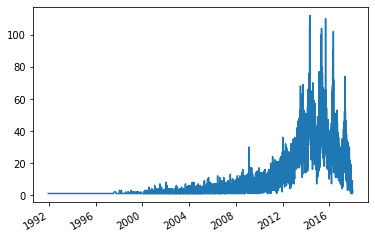

In [25]:
# DOB plot
data.date_of_birth.value_counts().sort_values().plot.line()

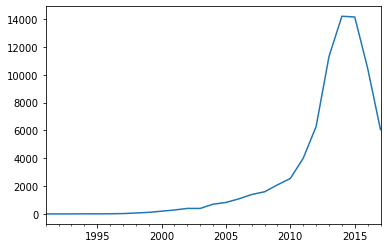

In [27]:
# DOB sampled by year
data.date_of_birth.value_counts().resample('Y').sum().plot.line()

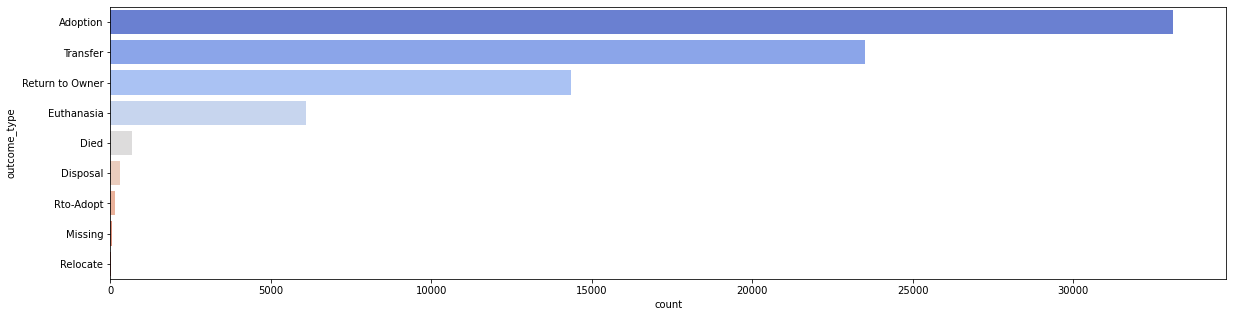

In [80]:
# Possible outcomes plot
plt.figure(figsize=(20,5))
sns.countplot(y=data['outcome_type'],
              palette='coolwarm',
              order=data['outcome_type'].value_counts().index
              )
plt.show()

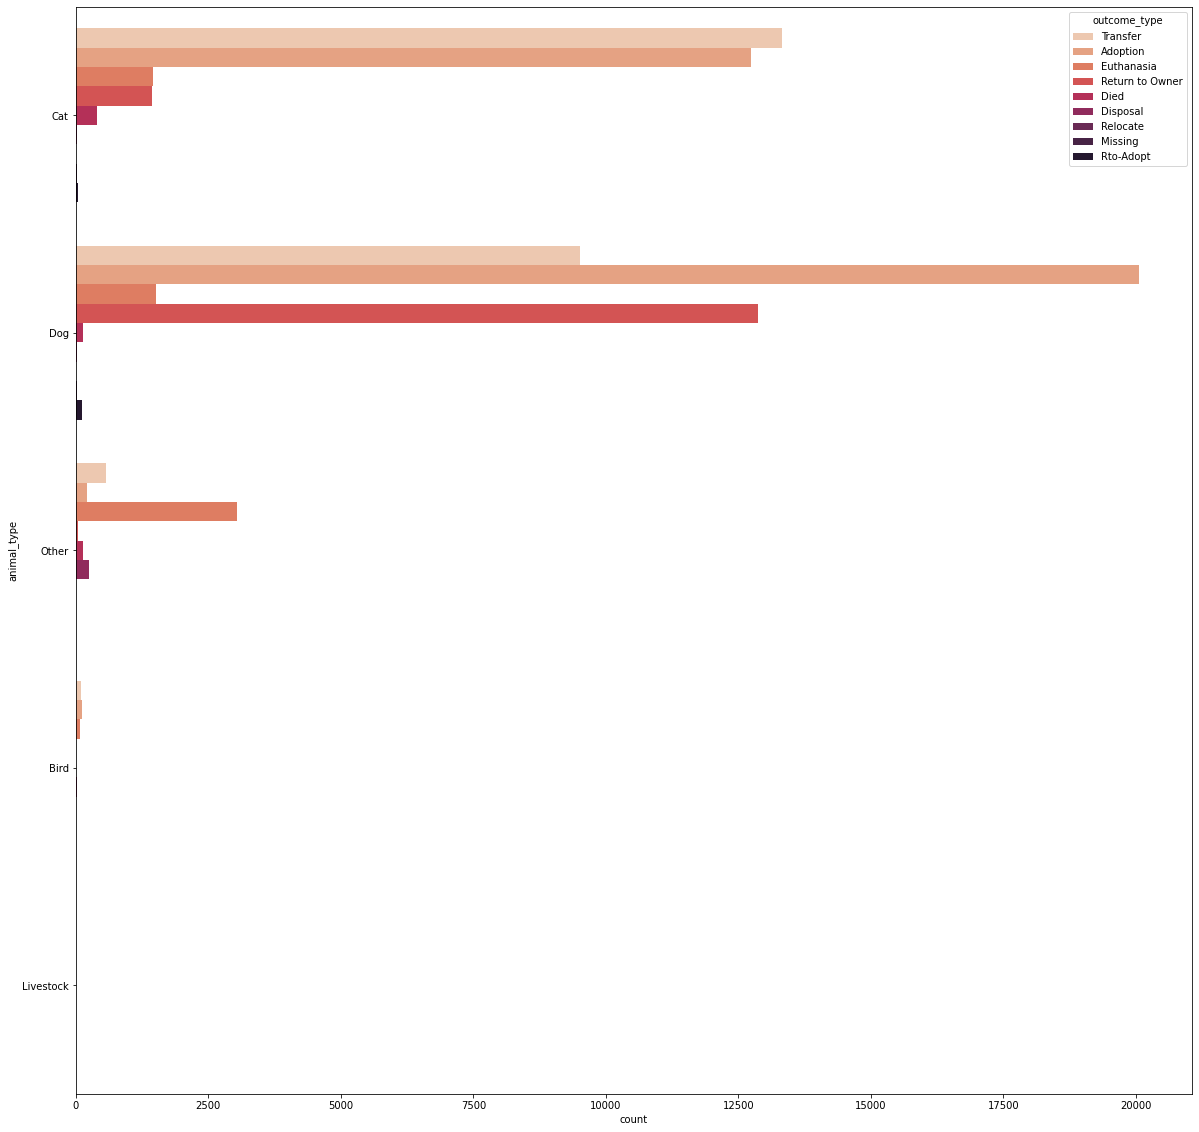

In [133]:
# Possible outcomes count plot by animals
plt.figure(figsize=(20,20))
sns.countplot(y='animal_type',
              hue='outcome_type',
              data=data,
              palette='rocket_r'
              )

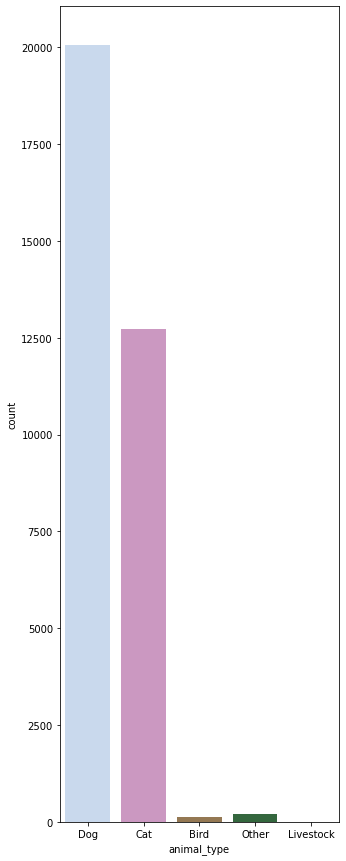

In [189]:
# Adoption bar graph by animal type
plt.figure(figsize=(5, 15))
sns.countplot(x='animal_type',
              data=data.loc[data['outcome_type'] == 'Adoption'],
              palette='cubehelix_r'
              )

### Splitting the data into test and train data and using only necessary columns and other data cleaning tasks

In [193]:
age_types = data['age_upon_outcome'].dropna().unique().tolist()
print(age_types)

['2 weeks', '1 year', '9 years', '5 months', '4 months', '3 years', '1 month', '3 months', '2 years', '2 months', '4 years', '8 years', '3 weeks', '8 months', '12 years', '7 years', '5 years', '6 years', '5 days', '10 months', '4 weeks', '10 years', '2 days', '6 months', '14 years', '11 months', '15 years', '7 months', '13 years', '11 years', '16 years', '9 months', '3 days', '6 days', '4 days', '5 weeks', '1 week', '1 day', '1 weeks', '0 years', '17 years', '20 years', '18 years', '19 years', '22 years', '25 years']


In [197]:
# We can see that age is not uniform and we know that age can affect outcome since the shelter would have policies regarding that.
# So let us convert the age_upon_outcome to age_in_days using DOB and date_upon_outcome
data['age_in_days'] = (data['datetime'] - data['date_of_birth']).dt.days
data['age_in_days'].describe()

count    78256.000000
mean       817.034822
std       1077.098289
min       -123.000000
25%         95.000000
50%        371.000000
75%       1096.000000
max       9137.000000
Name: age_in_days, dtype: float64

In [200]:
data[data['age_in_days'] < 0] = 0

In [201]:
# Let us remove the columns we don't need for training and testing
data.drop('age_upon_outcome', axis=1, inplace=True)
data.drop(['date_of_birth','datetime', 'monthyear'], axis=1, inplace=True)
data.drop('animal_id', axis=1, inplace=True) # We don't need id for our application.

In [202]:
# Transforming all string columns to lowercase strings for uniformity
string_cols = ['animal_type', 'breed', 'color', 'name', 'outcome_type', 'outcome_subtype', 'sex_upon_outcome']

for col in string_cols:
    data[col] = data[col].str.lower()

In [204]:
import string

def text_process(text):
    text = text.replace('/', ' ')
    return ''.join([char for char in text if char not in string.punctuation])

for col in string_cols:
    data[col] = data[col].apply(lambda x:text_process(str(x)))

In [205]:
data.head()

,animal_type,breed,color,name,outcome_subtype,outcome_type,sex_upon_outcome,age_in_days
0,cat,domestic shorthair mix,orange tabby,nan,partner,transfer,intact male,15
1,dog,beagle mix,white brown,lucy,partner,transfer,spayed female,366
2,dog,pit bull,blue white,johnny,nan,adoption,neutered male,429
3,dog,miniature schnauzer mix,white,monday,partner,transfer,neutered male,3300
4,other,bat mix,brown,nan,rabies risk,euthanasia,unknown,181


In [214]:
from sklearn.preprocessing import LabelEncoder

string_cols = ['animal_type', 'breed', 'color', 'name', 'outcome_type', 'sex_upon_outcome']

def encoder(data):
    for col in string_cols:
        label_encoder = LabelEncoder()
        label_encoder.fit(data[col])
        data[col] = label_encoder.transform(data[col])
    return data

data = encoder(data)

In [219]:
from sklearn.model_selection import train_test_split

X = data.drop(['outcome_type', 'outcome_subtype'], axis=1)
y = data['outcome_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Using a Decision Tree model from scikit-learn

In [220]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [221]:
predictions = dtree.predict(X_test)

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6622
           1       0.12      0.11      0.12       136
           2       0.21      0.08      0.12        61
           3       0.56      0.59      0.57      1216
           4       0.00      0.00      0.00         9
           5       0.29      0.50      0.36         4
           6       0.00      0.00      0.00         3
           7       0.50      0.49      0.50      2871
           8       0.00      0.00      0.00        30
           9       0.59      0.60      0.59      4700

    accuracy                           0.61     15652
   macro avg       0.30      0.31      0.30     15652
weighted avg       0.61      0.61      0.61     15652



### Using random  forest classifier for better results

In [223]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [224]:
rf_predictions = rf.predict(X_test)

print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      6622
           1       0.26      0.07      0.11       136
           2       0.43      0.10      0.16        61
           3       0.74      0.57      0.65      1216
           4       0.00      0.00      0.00         9
           5       0.67      0.50      0.57         4
           6       0.00      0.00      0.00         3
           7       0.57      0.58      0.58      2871
           8       0.00      0.00      0.00        30
           9       0.72      0.61      0.67      4700

    accuracy                           0.69     15652
   macro avg       0.41      0.33      0.35     15652
weighted avg       0.68      0.69      0.68     15652



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using Gaussian Naive Baiyes Classifier

In [225]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [227]:
gnb_predictions = gnb.predict(X_test)

print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.63      0.77      0.69      6622
           1       0.00      0.00      0.00       136
           2       0.00      0.00      0.00        61
           3       0.36      0.05      0.08      1216
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4
           6       0.00      1.00      0.00         3
           7       0.47      0.34      0.39      2871
           8       0.00      0.00      0.00        30
           9       0.69      0.44      0.54      4700

    accuracy                           0.52     15652
   macro avg       0.21      0.26      0.17     15652
weighted avg       0.59      0.52      0.53     15652



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the random forest classifier works best for our use.


### Checking feature importance for Random Forest

In [239]:
data.head()

,animal_type,breed,color,name,outcome_subtype,outcome_type,sex_upon_outcome,age_in_days
0,1,943,326,7452,13,9,1,15
1,2,279,474,6324,13,9,4,366
2,2,1614,118,5163,11,0,3,429
3,2,1483,463,7162,13,9,3,3300
4,5,253,121,7452,15,3,5,181


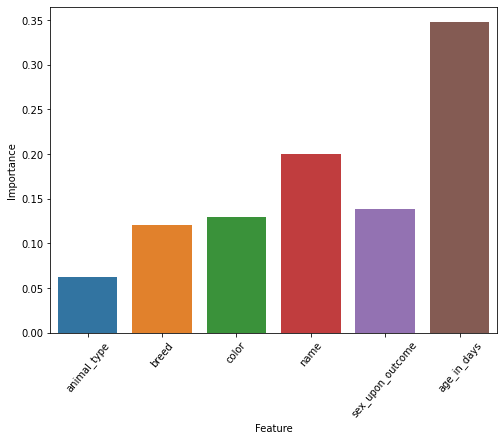

In [251]:
feat_imp = pd.DataFrame({
    'Feature': data.drop(['outcome_type', 'outcome_subtype'], axis=1).columns[:],
    'Importance': rf.feature_importances_.tolist()
})

plt.figure(figsize=(8, 6))
feature_plot = sns.barplot(data=feat_imp, x='Feature', y='Importance')
labels = feature_plot.get_xticklabels()
feature_plot.set_xticklabels(labels,rotation=50)
plt.show(g)